In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
dat = pd.read_csv("./output_scrape/output_2019.csv")

In [12]:
dat.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2019-11-15 07:08:46,os_alexsm,warpling,0,0,0,Not sure if you have workflows that this appli...,NaN,@zapier,NaN,1195237188893495296,https://twitter.com/os_alexsm/status/119523718...
1,2019-11-15 07:07:42,Contextify1,Contextify1,0,0,0,Agree with the sentiment that it is rare to fi...,NaN,NaN,NaN,1195236919602364416,https://twitter.com/Contextify1/status/1195236...
2,2019-11-15 07:02:20,benvanessen,theJeremySchmit,0,0,0,@tferriss Curious to know if you have any Zapi...,NaN,@tferriss,NaN,1195235566515830786,https://twitter.com/benvanessen/status/1195235...
3,2019-11-15 06:58:01,renewhr,NaN,0,0,0,3 in 4 U.S. Knowledge Workers Would Be Willing...,NaN,NaN,NaN,1195234483286315008,https://twitter.com/renewhr/status/11952344832...
4,2019-11-15 06:46:25,smsads07,AndrewJDavison,0,0,0,OK will try this. Thanks,NaN,NaN,NaN,1195231562331303937,https://twitter.com/smsads07/status/1195231562...


In [13]:
dat["text"].head(10)

0    Not sure if you have workflows that this appli...
1    Agree with the sentiment that it is rare to fi...
2    @tferriss Curious to know if you have any Zapi...
3    3 in 4 U.S. Knowledge Workers Would Be Willing...
4                             OK will try this. Thanks
5    The Zapier Blog: 5 things retailers should do ...
6    MSPs delivering Zapier to small businesses acr...
7    We used over a dozen productivity apps includi...
8    What to do after Black Friday & Cyber Monday: ...
9    Tomorrow on my weekly Zoom in with Seth David ...
Name: text, dtype: object

In [14]:
from polyglot.detect import Detector

In [15]:
import re

# Count words in text. Preprocessing for filtering out text of word count = 1 so language detector can work
dat["num_words"] = dat["text"].apply(lambda x: len(re.findall(r'\w+', str(x))))

In [16]:
# Drop all rows where text is only 1 word
dat = dat[dat["num_words"] >1]

In [17]:
# dat1 reset index
dat = dat.reset_index().drop(["index"], axis = 1)


In [18]:
import warnings
warnings.filterwarnings(action = "ignore")

from polyglot.detect import Detector

dat["detector"] = dat["text"].apply(lambda x: Detector(x, quiet = True))

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

In [19]:
# Extract language and confidence level from Detector objects
# https://stackoverflow.com/questions/51503199/how-to-apply-polyglot-detector-function-to-dataframe

import icu
dat["language"] = dat["detector"].apply(lambda x: icu.Locale.getDisplayName(x.language.locale))
dat["confidence"] = dat["detector"].apply(lambda x: x.language.confidence)

In [20]:
dat = dat[dat["language"] == "English"].reset_index().drop(columns = "index")

In [21]:
dat.shape

(26660, 16)

In [22]:
import re 

# Check if there is a question mark
dat["question_mark"] = dat["text"].apply(lambda x: len(re.findall(r".+\?.*", x)) >= 1 )

In [23]:
for i in dat["text"].head():
    print(i)
    print("\n")

Not sure if you have workflows that this applies to, but @zapier is my jam. Saves me SOOOOOO much time


Agree with the sentiment that it is rare to find a good, large, bootstrapped consumer business. Any sufficiently large TAM will attract competitors, many of whom have no qualms with soliciting investment (e.g. speculation that 1Pass's round was spurred by Dashlane's before it)


@tferriss Curious to know if you have any Zapier pro tips! What do you automate?


3 in 4 U.S. Knowledge Workers Would Be Willing to Quit to Work From Home, Zapier Report Finds https://www.hrtechnologist.com/news/mobile-workforce/3-in-4-us-knowledge-workers-would-be-willing-to-quit-to-work-from-home-zapier-report-finds/?utm_source=dlvr.it&utm_medium=twitter&utm_campaign=rss_subscribers …


OK will try this. Thanks




In [243]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# nltk.download('punkt')

# Freq Dist

In [260]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer, TweetTokenizer

# nltk.download("stopwords")

# remove stop words and punctuation
stop = stopwords.words('english')
stop.append("'m")
stop.append("...")
stop.append("’")
stop.append("'s")
stop.append("n't")
stop.append("``")
stop.append("''")
stop.append("•")
stop.append("http")
stop.append("https")
stop.append("…")
stop.append("'re")
stop.append("“")
stop.append("”")
stop.append("'ve")
stop.append("'ll")
stop.append("'d'")
stop.append("zapier")

stop_words_to_put_back = ["after", "any", "both", "between", "do","once","these","off",
                          #"on", "to", "and", "with","you",
                          "through","what", "when", "while","which", "where"]
for i in stop_words_to_put_back:
    stop.remove(i)

stop = set(stop)

# Create function for tokenizing while removing stop words and punctuation
def tokenize_rm_stop_punct(text, stop_words = stop, lower = True):
    all_stops = stop_words | set(string.punctuation)
    
    if lower == True:
        # tokenized_set = nltk.word_tokenize(text.lower())  
        tokenized_set = TweetTokenizer(text.lower())  
        tokenized_clean_set = [t for t in tokenized_set if t not in stop | set(string.punctuation)]
    else: 
        tokenized_set = nltk.word_tokenize(x.lower())  
        tokenized_clean_set = [t for t in tokenized_set if t not in stop | set(string.punctuation)]
    
    return tokenized_clean_set


In [261]:
list_str = list(dat2["text"])

In [262]:
list_str_tot = "\n".join(list_str)

In [263]:
fd1 = FreqDist(tokenize_rm_stop_punct(list_str_tot, stop))
fd1.most_common(50)

TypeError: 'TweetTokenizer' object is not iterable

In [248]:
import copy

# Create normalised word count with deepcopy
fd1_norm = copy.deepcopy(fd1)

for word in fd1_norm:
    fd1_norm[word] /= fd1.N()

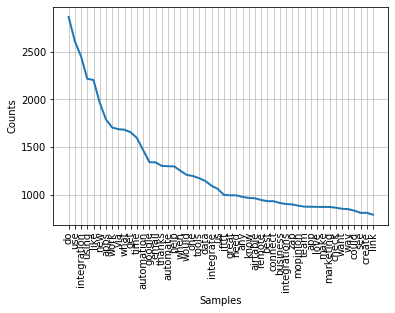

In [249]:
# Plot word count
fd1.plot(50)

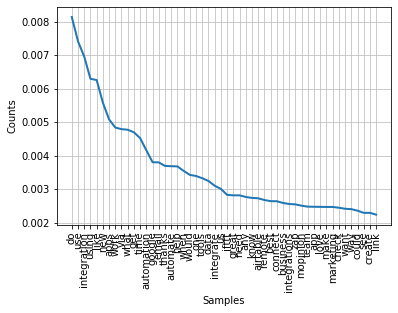

In [250]:
# Plot normalised word count
fd1_norm.plot(50)

## Using Pandas Dataframe for Altair plots

In [251]:
df = pd.DataFrame(fd1.items(), columns= ["Word", "Count"])

In [252]:
total_word_count = sum(df["Count"])
df["Prob"] = df["Count"].map(lambda x: x/total_word_count)

# Sort then reset axis and create column
df = df.sort_values(by = "Count", ascending = False).reset_index(drop = True).rename_axis("sorting_order").reset_index()

In [253]:
df.head()

,sorting_order,Word,Count,Prob
0,0,do,2866,0.008138
1,1,use,2610,0.007411
2,2,integration,2451,0.006960
3,3,using,2217,0.006295
4,4,like,2204,0.006258


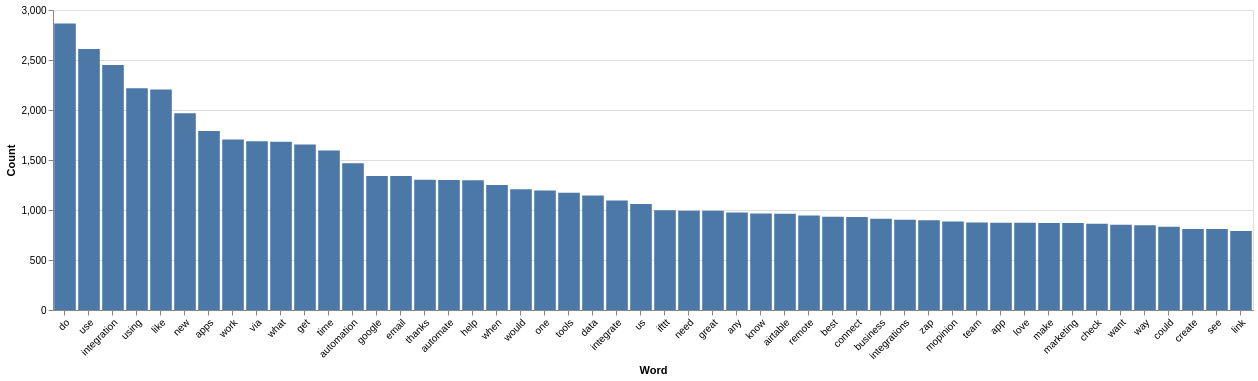

In [254]:
alt.Chart(df[:50]).mark_bar().encode(
    x = alt.X("Word:N",
             sort=alt.EncodingSortField(field='sort_order', op="mean", order='ascending')),
    y = alt.Y("Count:Q"),
    tooltip = ["Word","Count"]
).properties(
    width = 1200
).configure_axisX(
    labelAngle = -45
)

## Word Cloud

In [255]:
#https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python

from wordcloud import WordCloud

In [256]:
wordcloud = WordCloud(background_color = "white",
                     width = 3000,
                     height = 1500)

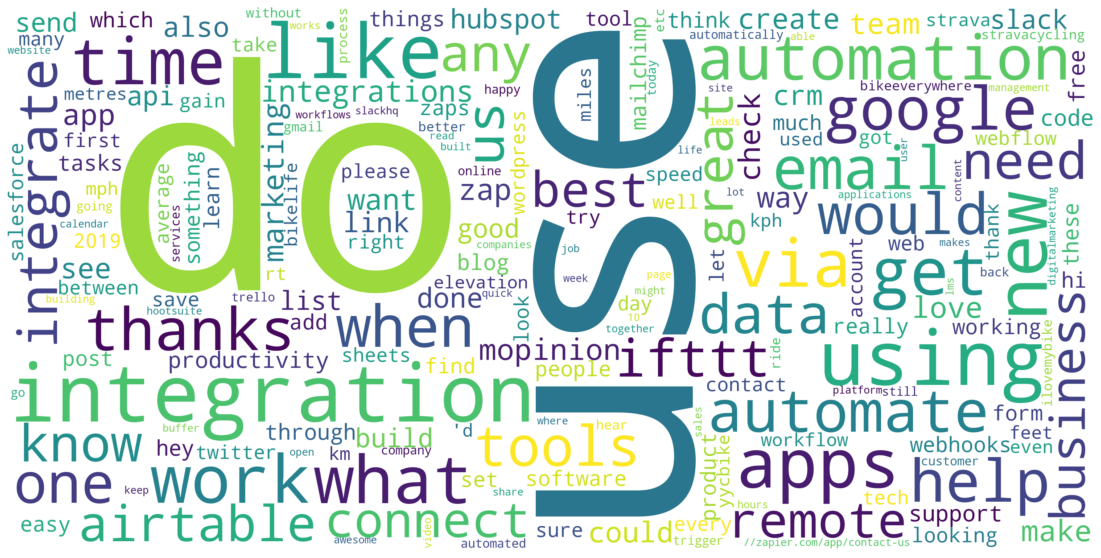

In [257]:
# Generate plot from all words
wordcloud.generate_from_frequencies(fd1)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

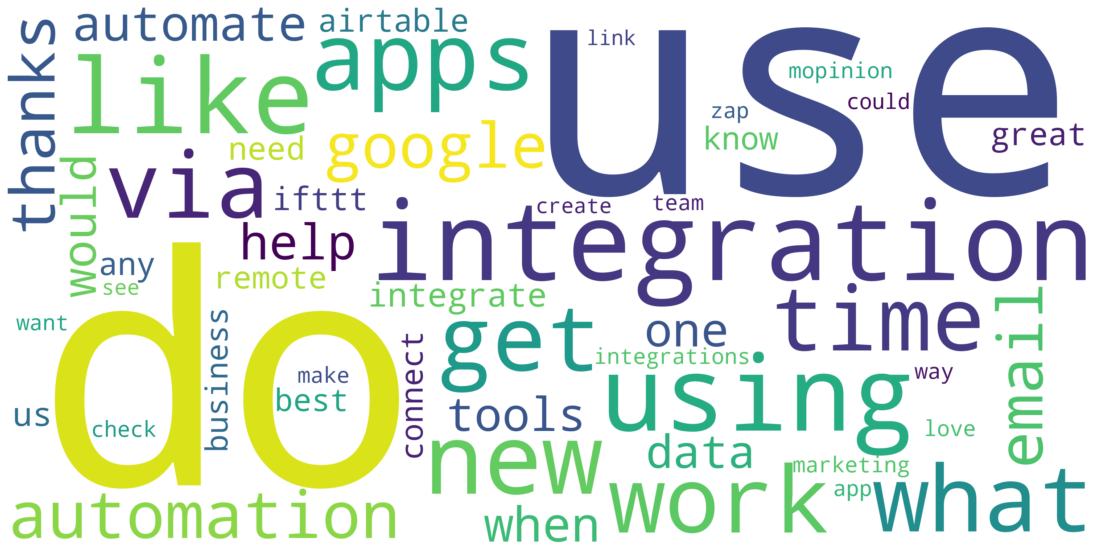

In [258]:
# Generate word cloud from top 50 words

fd1_50 = dict(fd1.most_common(50))

wordcloud.generate_from_frequencies(fd1_50)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()